<a href="https://colab.research.google.com/github/songmac/2023-Algorithm-Study-purDA/blob/main/231013_%EB%8B%A8%EC%96%B4%EC%9D%98%ED%91%9C%ED%98%84_%EC%8B%A4%EC%8A%B51_BOW(solving).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BOW 직접 구현

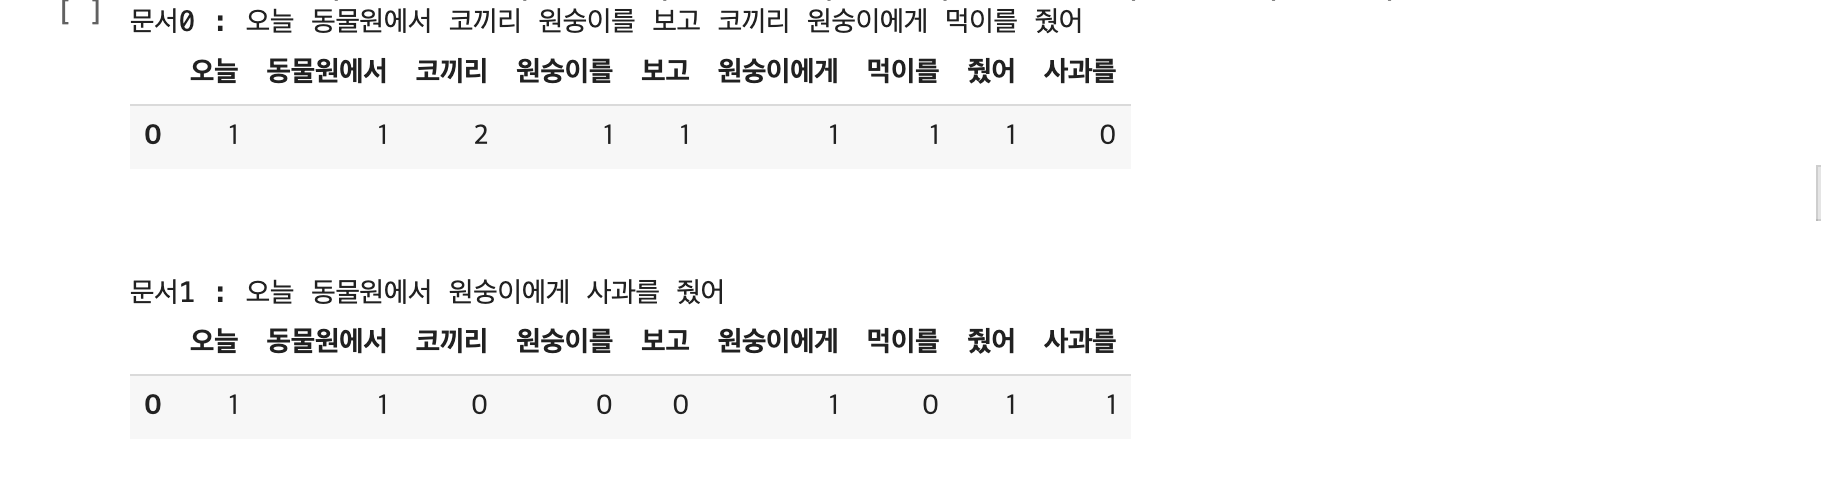

In [ ]:
# 1. 문서에서 유니크한 단어를 뽑고 인덱스를 부여한다.
# 2. 각 단어가 몇 번 나왔는지 숫자를 센다.
# 3. index, count 된 단어 인덱스를 통해 다시 단어로 변환한다.

sentences = ['오늘 동물원에서 코끼리 원숭이를 보고 코끼리 원숭이에게 먹이를 줬어',
             '오늘 동물원에서 원숭이에게 사과를 줬어']

# sentences에서 단어 토큰을 추출하여 고유한 vocab으로 만드는 함수 (문장 2개 기준)
def sentences_to_vocabs(sentences):

    vocabs = []
    for sentence in sentences:
        tokens = sentence.split() ##문장 2개 토큰으로 분할
        for token in tokens:
            if not token in vocabs: #토큰 중복 제거
                vocabs.append(token) #나열
    return vocabs #중복된 토큰을 제외한 단어들 나열

vocabs = sentences_to_vocabs(sentences)
print(vocabs)

# 생성한 vocabs을 이용하여 문장을 벡터로 변환하는 함수 (문장 1개 기준)
def senteces_to_vector(vocabs, sentence):
    sentence_tokens = sentence.split() #문장 1개를 토큰으로 분할

    vector = []
    for vocab in vocabs: #중복된 토큰을 제외한 단어 한개씩 나열
        if vocab in sentence_tokens:
            count = sentence_tokens.count(vocab) #문장 1개에서 n번째 토큰 개수 세기
            vector.append(count) # 벡터 리스트에 토큰 개수 차례로 넣기
        else:
            vector.append(0) # count할 것이 더이상 없으면 벡터리스트에 넣는 것 마침

    return vector

vectors = []
for sentence in sentences: #문장 1개당 1번씩 벡터 리스트 생성
    vector = senteces_to_vector(vocabs, sentence)
    vectors.append(vector)

print(vectors)

['오늘', '동물원에서', '코끼리', '원숭이를', '보고', '원숭이에게', '먹이를', '줬어', '사과를']
[[1, 1, 2, 1, 1, 1, 1, 1, 0], [1, 1, 0, 0, 0, 1, 0, 1, 1]]


In [ ]:
print("전체 vocab의 수: {}개".format(len(vocabs))) #유니크 토큰 출력

전체 vocab의 수: 9개


In [ ]:
# (응용편) sentence 1개를 1줄씩 입력하여 중복되지 않은 토큰을 출력하는 함수 (solving)

sentences = [['오늘 동물원에서 코끼리 원숭이를 보고 코끼리 원숭이에게 먹이를 줬어',
             '오늘 동물원에서 원숭이에게 사과를 줬어']]

def sentence_to_vocabs(sentences):

  tokens = []
  for sentence in sentences:
    sentence = sentence + sentence
    for token in sentence:
      tokens = token.split()
      for token in tokens:
        if not token in tokens: #토큰 중복 제거
          token.append(token) #나열

  return tokens

tokens = sentence_to_vocabs(sentences)
print(tokens)

['오늘', '동물원에서', '원숭이에게', '사과를', '줬어']


# BoW sklearn (solving)

# TDM 직접구현 (solving)

In [ ]:
docs = ['동물원 코끼리',
        '동물원 원숭이 바나나',
        '엄마 코끼리 아기 코끼리',
        '원숭이 바나나 코끼리 바나나']

In [ ]:
doc_ls=[]
for doc in docs:
  doc_ls.append(doc.split(' '))
doc_ls

[['동물원', '코끼리'],
 ['동물원', '원숭이', '바나나'],
 ['엄마', '코끼리', '아기', '코끼리'],
 ['원숭이', '바나나', '코끼리', '바나나']]